In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from distgen.physical_constants import unit_registry
import numpy as np

uniform
      min_x = 2.000 mm, max_x = 4.000 mm


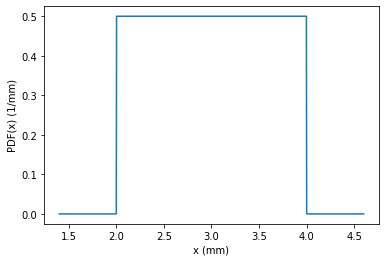

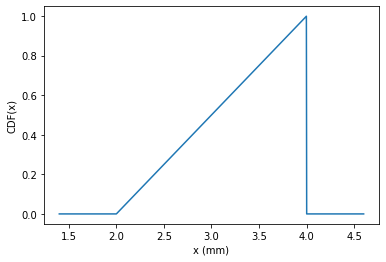

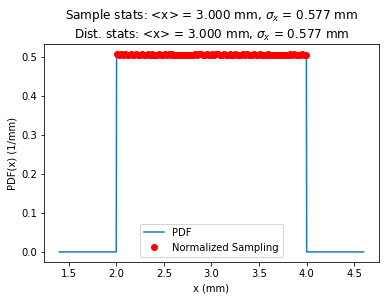

In [27]:
from distgen.dist import Uniform
var = 'x'
verbose=1
params={'min_x':2*unit_registry('mm'),'max_x':4*unit_registry('mm')}
uniform = Uniform(var,verbose=verbose,**params)
uniform.plot_pdf()
uniform.plot_cdf()
uniform.test_sampling()

Gaussian
      avg_x = -1.000 mm, sigma_x = 2.000 mm


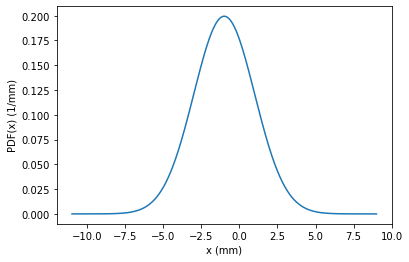

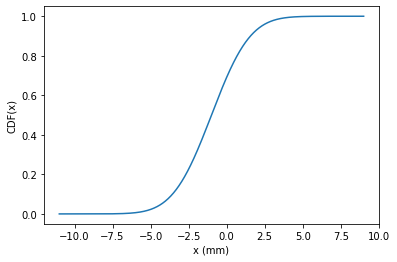

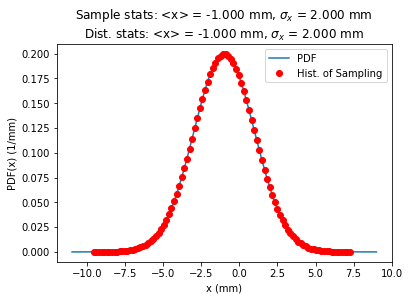

In [4]:
from distgen.dist import Norm
var = 'x'
verbose=1
params={'sigma_x':2*unit_registry('mm'),'avg_x':-1*unit_registry('mm')}
norm = Norm(var,verbose=verbose,**params)
norm.plot_pdf()
norm.plot_cdf()
norm.test_sampling()

t-distribution file: 'cutgauss.1d.txt'


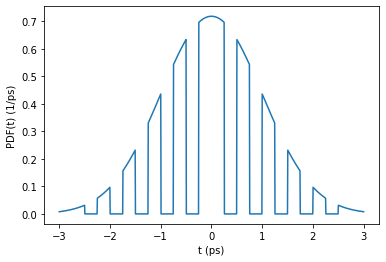

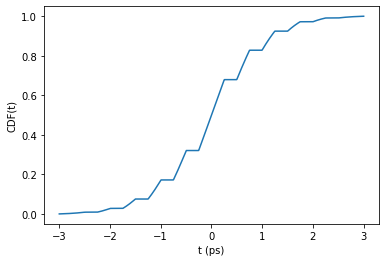

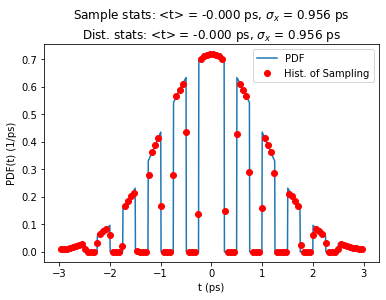

In [5]:
from distgen.dist import File1d
var = 't'
verbose=1
params={'file':'cutgauss.1d.txt','units':'ps'}
file1d = File1d(var,verbose=verbose,**params)
file1d.plot_pdf()
file1d.plot_cdf()
file1d.test_sampling()

crystal temporal laser shaping
      crystal 1 length = 15.096 mm, angle = 0.600 deg
      crystal 2 length = 7.548 mm, angle = 1.800 deg
      crystal 3 length = 3.774 mm, angle = -0.900 deg
      crystal 4 length = 1.887 mm, angle = -0.500 deg
      Pulses propagated: min t = -23.905 ps, max t = 23.905 ps


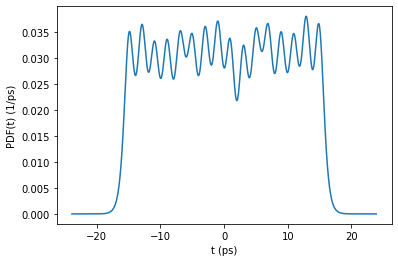

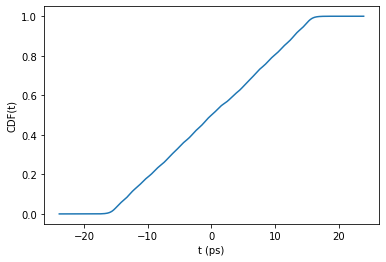

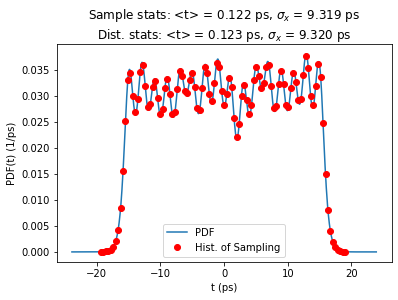

In [6]:
from distgen.dist import TemporalLaserPulseStacking
verbose=1
params={'crystal_length_1': 15.096*unit_registry('mm'),
        'crystal_length_2': 7.548*unit_registry('mm'), 
        'crystal_length_3': 3.774*unit_registry('mm'), 
        'crystal_length_4': 1.887*unit_registry('mm'), 
        'crystal_angle_1':  0.6*unit_registry('deg'), 
        'crystal_angle_2':  1.8*unit_registry('deg'), 
        'crystal_angle_3': -0.9*unit_registry('deg'),  
        'crystal_angle_4': -0.5*unit_registry('deg'), }
    
laser_pulse = TemporalLaserPulseStacking(verbose=verbose,**params)
laser_pulse.plot_pdf()
laser_pulse.plot_cdf()
laser_pulse.test_sampling()

Tukey
      legnth = 2.000 mm, ratio = 0.750


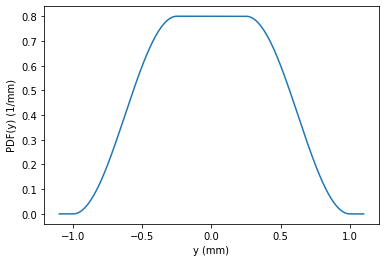

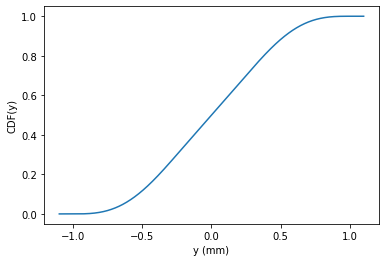

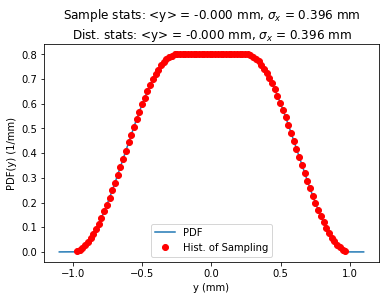

In [7]:
from distgen.dist import Tukey
var = 'y'
verbose=1
params={'length':2*unit_registry('mm'),'ratio':0.75*unit_registry('dimensionless')}
tukey = Tukey(var,verbose=1,**params)
tukey.plot_pdf()
tukey.plot_cdf()
tukey.test_sampling()

radial uniform
      min_r = 1.000 mm, max_r = 2.000 mm


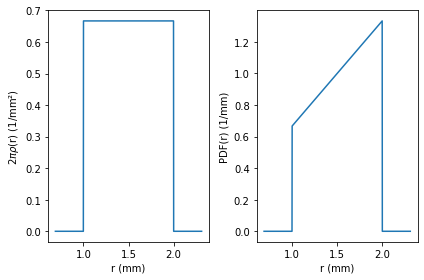

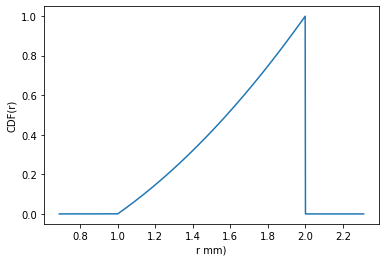

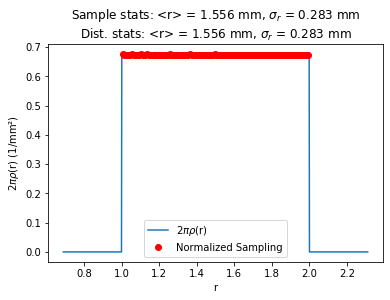

In [39]:
from distgen.dist import UniformRad
verbose=1
params={'min_r':1*unit_registry('mm'),'max_r':2*unit_registry('mm')}
urad = UniformRad(verbose=1,**params)
urad.plot_pdf()
urad.plot_cdf()
urad.test_sampling()

radial Gaussian
      sigma_xy = 1.000 mm


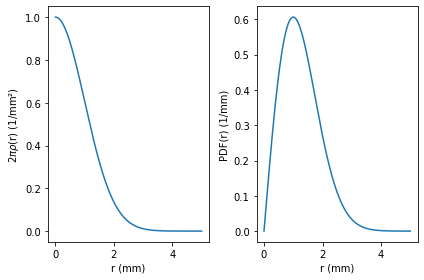

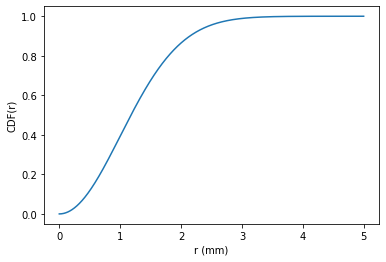

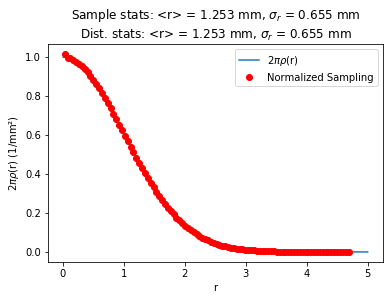

In [41]:
from distgen.dist import NormRad
verbose=1
params={'sigma_xy':1*unit_registry('mm')}
nrad = NormRad(verbose=1,**params)
nrad.plot_pdf()
nrad.plot_cdf()
nrad.test_sampling()

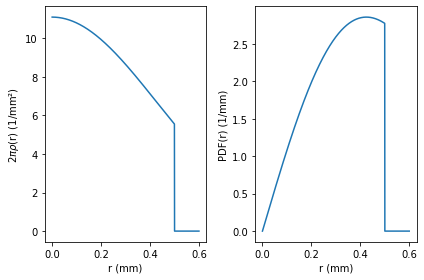

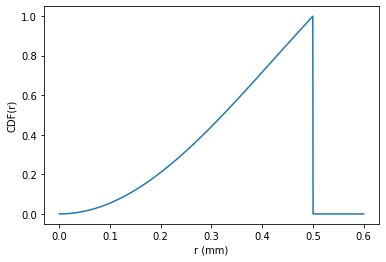

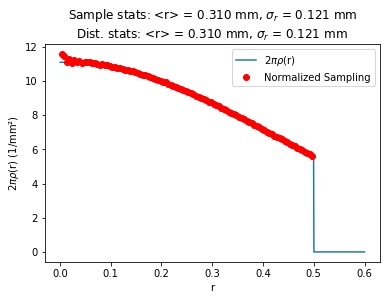

In [49]:
from distgen.dist import NormRadTrunc
verbose=1
params={'pinhole_size':1*unit_registry('mm'),'fraction':0.5*unit_registry('dimensionless')}
nradt = NormRadTrunc(verbose=1,**params)
nradt.plot_pdf()
nradt.plot_cdf()
nradt.test_sampling()


TukeyRad
      legnth = 1.000 mm, ratio = 0.750


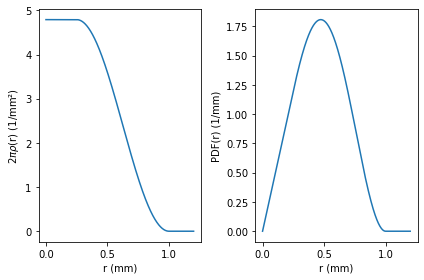

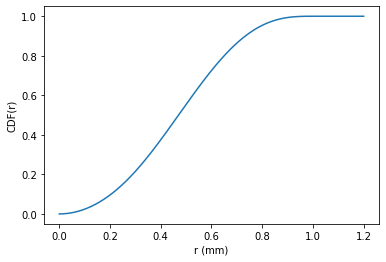

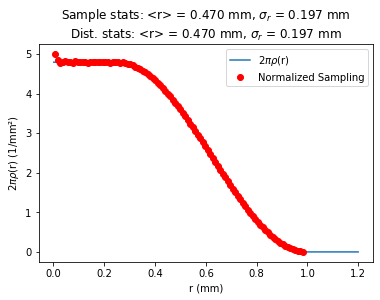

In [78]:
from distgen.dist import TukeyRad
verbose=1
params={'length':1*unit_registry('mm'),'ratio':0.75*unit_registry('dimensionless')}
rtukey = TukeyRad(verbose=1,**params)
rtukey.plot_pdf()
rtukey.plot_cdf()
rtukey.test_sampling()